In [4]:
pip install pandas requests matplotlib seaborn plotly scikit-learn

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
import json
import pandas as pd

file_path = 'TelecomX_Data.json'

with open(file_path, 'r') as f:
    data = json.load(f)

# Convertir el JSON a un DataFrame de Pandas
df = pd.DataFrame(data)

print("Datos cargados exitosamente. Primeras 5 filas:")
print(df.head())
print("\nInformación general del DataFrame:")
df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'TelecomX_Data.json'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#📌 Extracción

In [ ]:
file_path = 'TelecomX_Data.json'

try:
    with open(file_path, 'r') as f:
        # Carga el contenido del archivo JSON
        data = json.load(f)

    # Convierte los datos JSON a un DataFrame de Pandas
    df = pd.DataFrame(data)

    print(f"\nDatos cargados exitosamente desde '{file_path}'.")
    print("Primeras 5 filas del DataFrame:")
    print(df.head())
    print("\nInformación general del DataFrame:")
    df.info()
    print(f"\nEl DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no se encontró. Asegúrate de haberlo subido correctamente y de que el nombre coincida.")
except Exception as e:
    print(f"Ocurrió un error al cargar o procesar el archivo: {e}")

#🔧 Transformación

In [ ]:
# 4. Listar todas las columnas
print("\nNombres de todas las columnas:")
print(df.columns.tolist())

#📊 Carga y análisis

#📄Informe final

Para comprender mejor el significado de cada columna y su relevancia, te recomiendo consultar el diccionario de datos proporcionado en el siguiente enlace:

🔗 [Enlace al diccionario y a la API](https://raw.githubusercontent.com/google/generative-ai-docs/main/site/en/examples/gemini/retrieval/TelecomX_Data_Dictionary.json)

Una vez que revises el diccionario, podrás identificar las columnas más relevantes para predecir la evasión de clientes.

In [ ]:
# Flatten the 'customer' column
customer_df = pd.json_normalize(df['customer'])

# Flatten the 'phone' column
phone_df = pd.json_normalize(df['phone'])

# Flatten the 'internet' column
internet_df = pd.json_normalize(df['internet'])

# Flatten the 'account' column
account_df = pd.json_normalize(df['account'])

# Concatenate the new dataframes with the original dataframe (excluding the original nested columns)
df_flattened = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

print("DataFrame aplanado exitosamente. Primeras 5 filas:")
display(df_flattened.head())

print("\nInformación general del DataFrame aplanado:")
df_flattened.info()

In [ ]:
# Check for missing values
print("\nValores faltantes por columna:")
print(df_flattened.isnull().sum())

# Check the data type of 'Charges.Total' and attempt conversion
print(f"\nTipo de dato actual de 'Charges.Total': {df_flattened['Charges.Total'].dtype}")

# Attempt to convert 'Charges.Total' to numeric, coercing errors
df_flattened['Charges.Total'] = pd.to_numeric(df_flattened['Charges.Total'], errors='coerce')

print(f"Tipo de dato después de la conversión de 'Charges.Total': {df_flattened['Charges.Total'].dtype}")

# Check for missing values again after conversion
print("\nValores faltantes por columna después de intentar convertir 'Charges.Total':")
print(df_flattened.isnull().sum())

# Check for duplicate rows
print(f"\nNúmero de filas duplicadas: {df_flattened.duplicated().sum()}")

In [ ]:
# Drop rows with missing values in 'Charges.Total'
df_cleaned = df_flattened.dropna(subset=['Charges.Total']).copy()

print("Filas con valores faltantes en 'Charges.Total' eliminadas.")
print("\nInformación general del DataFrame después de eliminar filas con valores faltantes:")
df_cleaned.info()

print("\nValores faltantes por columna después de eliminar filas:")
print(df_cleaned.isnull().sum())

# Task
Prepara los datos para el modelado.

## Identificar columnas categóricas y numéricas

### Subtask:
Separar las columnas del DataFrame en dos listas, una para las variables categóricas y otra para las numéricas.


**Reasoning**:
Identify and separate numerical and categorical columns in the cleaned DataFrame based on their data types, excluding 'customerID' and 'Churn' from categorical features as per instructions.



In [ ]:
# Identify numerical features
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical features, excluding 'customerID' and 'Churn'
categorical_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()
categorical_features = [col for col in categorical_features if col not in ['customerID', 'Churn']]

# Print the lists
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

## Codificar variables categóricas

### Subtask:
Aplicar One-Hot Encoding a las columnas categóricas para convertirlas en un formato numérico adecuado para los modelos.


**Reasoning**:
Apply One-Hot Encoding to the categorical features.



In [ ]:
# Instantiate OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the selected categorical columns
encoded_categorical_features = encoder.fit_transform(df_cleaned[categorical_features])

# Create a new DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_categorical_features, columns=encoder.get_feature_names_out(categorical_features), index=df_cleaned.index)

# Display the first few rows and information of the new DataFrame
print("Encoded categorical features DataFrame:")
display(encoded_df.head())
print("\nInformation of the encoded DataFrame:")
encoded_df.info()

## Escalar variables numéricas

### Subtask:
Aplicar un escalador (como StandardScaler) a las columnas numéricas para normalizar sus rangos.


**Reasoning**:
Apply StandardScaler to the numerical features and create a new DataFrame with the scaled features.



In [ ]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_numerical_features = scaler.fit_transform(df_cleaned[numerical_features])

# Create a new DataFrame from the scaled numerical features
scaled_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features, index=df_cleaned.index)

# Print the first few rows and information of the new DataFrame
print("Scaled numerical features DataFrame:")
display(scaled_df.head())
print("\nInformation of the scaled DataFrame:")
scaled_df.info()

## Combinar las características procesadas

### Subtask:
Unir las columnas categóricas codificadas y las columnas numéricas escaladas en un único DataFrame listo para el modelado.


**Reasoning**:
Concatenate the encoded categorical features and scaled numerical features into a single DataFrame.



In [ ]:
# Concatenate the encoded and scaled dataframes
df_processed = pd.concat([encoded_df, scaled_df], axis=1)

# Display the first few rows and information of the combined DataFrame
print("Processed DataFrame (encoded categorical + scaled numerical):")
display(df_processed.head())

print("\nInformation of the processed DataFrame:")
df_processed.info()

## Separar características (x) y variable objetivo (y)

### Subtask:
Definir las variables predictoras (X) y la variable objetivo (y, que es 'Churn').


**Reasoning**:
Create the predictor DataFrame X and the target Series y, then display their heads.



In [ ]:
# Create the predictor DataFrame X
X = df_processed.copy()

# Create the target Series y
y = df_cleaned['Churn'].copy()

# Print the first few rows of X and y
print("Primeras 5 filas del DataFrame de predictores (X):")
display(X.head())

print("\nPrimeras 5 filas de la Serie objetivo (y):")
display(y.head())

## Dividir los datos en conjuntos de entrenamiento y prueba

### Subtask:
Separar el DataFrame en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.


**Reasoning**:
Split the features and target into training and testing sets and print their shapes.



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

## Summary:

### Data Analysis Key Findings

*   The columns in the DataFrame were successfully separated into numerical features and categorical features. The numerical features identified are 'SeniorCitizen', 'tenure', 'Charges.Monthly', and 'Charges.Total'. The categorical features are all `object` type columns except 'customerID' and 'Churn'.
*   One-Hot Encoding was successfully applied to the identified categorical features, creating a new DataFrame `encoded\_df` with 41 new columns representing the encoded categories.
*   Numerical features were successfully scaled using `StandardScaler`, resulting in the `scaled\_df` DataFrame with the numerical columns ('SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total') scaled to a mean of 0 and a standard deviation of 1.
*   The encoded categorical features (`encoded\_df`) and the scaled numerical features (`scaled\_df`) were successfully combined into a single DataFrame `df\_processed`, which contains 7256 rows and 45 columns.
*   The predictor variables (X) were defined as the `df\_processed` DataFrame, and the target variable (y) was defined as the 'Churn' column from the original cleaned DataFrame.
*   The data was successfully split into training and testing sets, with 80% for training (X\_train, y\_train) and 20% for testing (X\_test, y\_test). The training set has 5804 samples, and the testing set has 1452 samples, each with 45 features.

### Insights or Next Steps

*   The data is now fully preprocessed and ready for training various machine learning models to predict customer churn.
*   The next step is to select and train appropriate classification models (e.g., Logistic Regression, Random Forest, Gradient Boosting) using the training data and evaluate their performance on the test data.


In [ ]:
# Create the 'Cuentas_Diarias' column
# Using an average of 30.44 days per month for the calculation
df_cleaned['Cuentas_Diarias'] = df_cleaned['Charges.Monthly'] / 30.44

print("Columna 'Cuentas_Diarias' creada exitosamente. Primeras 5 filas con la nueva columna:")
display(df_cleaned[['Charges.Monthly', 'Cuentas_Diarias']].head())

In [ ]:
# Encode the target variable 'Churn'
df_cleaned['Churn'] = df_cleaned['Churn'].map({'No': 0, 'Yes': 1})

print("Columna 'Churn' codificada exitosamente. Primeras 5 filas con la columna 'Churn' codificada:")
display(df_cleaned[['Churn']].head())

print("\nDistribución de la columna 'Churn' después de la codificación:")
print(df_cleaned['Churn'].value_counts())

## Summary:

### Data Analysis Key Findings

* The columns in the DataFrame were successfully separated into numerical features and categorical features. The numerical features identified are 'SeniorCitizen', 'tenure', 'Charges.Monthly', and 'Charges.Total'. The categorical features are all `object` type columns except 'customerID' and 'Churn'.
* One-Hot Encoding was successfully applied to the identified categorical features, creating a new DataFrame `encoded\_df` with 41 new columns representing the encoded categories.
* Numerical features were successfully scaled using `StandardScaler`, resulting in the `scaled\_df` DataFrame with the numerical columns ('SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total') scaled to a mean of 0 and a standard deviation of 1.
* The encoded categorical features (`encoded\_df`) and the scaled numerical features (`scaled\_df`) were successfully combined into a single DataFrame `df\_processed`, which contains 7256 rows and 45 columns.
* The predictor variables (X) were defined as the `df\_processed` DataFrame, and the target variable (y) was defined as the 'Churn' column from the original cleaned DataFrame.
* The data was successfully split into training and testing sets, with 80% for training (X\_train, y\_train) and 20% for testing (X\_test, y\_test). The training set has 5804 samples, and the testing set has 1452 samples, each with 45 features.

### Insights or Next Steps

* The data is now fully preprocessed and ready for training various machine learning models to predict customer churn.
* The next step is to select and train appropriate classification models (e.g., Logistic Regression, Random Forest, Gradient Boosting) using the training data and evaluate their performance on the test data.

In [ ]:
print("Estadísticas descriptivas de las características numéricas en X_train:")
display(X_train.describe())

print("\nDistribución de la variable objetivo (y_train):")
display(y_train.value_counts())

print("\nProporción de la variable objetivo (y_train):")
display(y_train.value_counts(normalize=True))

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='Churn')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
numerical_features_to_plot = ['tenure', 'Charges.Monthly', 'Charges.Total']

for feature in numerical_features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_cleaned, x=feature, hue='Churn', kde=True, palette='viridis')
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [6]:
import json
import pandas as pd

file_path = 'TelecomX_Data.json'

with open(file_path, 'r') as f:
    data = json.load(f)

# Convertir el JSON a un DataFrame de Pandas
df = pd.DataFrame(data)

print("Datos cargados exitosamente. Primeras 5 filas:")
print(df.head())
print("\nInformación general del DataFrame:")
df.info()

Datos cargados exitosamente. Primeras 5 filas:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetSe

In [7]:
# Flatten the 'customer' column
customer_df = pd.json_normalize(df['customer'])

# Flatten the 'phone' column
phone_df = pd.json_normalize(df['phone'])

# Flatten the 'internet' column
internet_df = pd.json_normalize(df['internet'])

# Flatten the 'account' column
account_df = pd.json_normalize(df['account'])

# Concatenate the new dataframes with the original dataframe (excluding the original nested columns)
df_flattened = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

print("DataFrame aplanado exitosamente. Primeras 5 filas:")
display(df_flattened.head())

print("\nInformación general del DataFrame aplanado:")
df_flattened.info()

DataFrame aplanado exitosamente. Primeras 5 filas:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4



Información general del DataFrame aplanado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 1

In [8]:
# Check for missing values
print("\nValores faltantes por columna:")
print(df_flattened.isnull().sum())

# Check the data type of 'Charges.Total' and attempt conversion
print(f"\nTipo de dato actual de 'Charges.Total': {df_flattened['Charges.Total'].dtype}")

# Attempt to convert 'Charges.Total' to numeric, coercing errors
df_flattened['Charges.Total'] = pd.to_numeric(df_flattened['Charges.Total'], errors='coerce')

print(f"Tipo de dato después de la conversión de 'Charges.Total': {df_flattened['Charges.Total'].dtype}")

# Check for missing values again after conversion
print("\nValores faltantes por columna después de intentar convertir 'Charges.Total':")
print(df_flattened.isnull().sum())

# Check for duplicate rows
print(f"\nNúmero de filas duplicadas: {df_flattened.duplicated().sum()}")


Valores faltantes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Tipo de dato actual de 'Charges.Total': object
Tipo de dato después de la conversión de 'Charges.Total': float64

Valores faltantes por columna después de intentar convertir 'Charges.Total':
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
Te

In [9]:
# Drop rows with missing values in 'Charges.Total'
df_cleaned = df_flattened.dropna(subset=['Charges.Total']).copy()

print("Filas con valores faltantes en 'Charges.Total' eliminadas.")
print("\nInformación general del DataFrame después de eliminar filas con valores faltantes:")
df_cleaned.info()

print("\nValores faltantes por columna después de eliminar filas:")
print(df_cleaned.isnull().sum())

Filas con valores faltantes en 'Charges.Total' eliminadas.

Información general del DataFrame después de eliminar filas con valores faltantes:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14

In [10]:
# Identify numerical features
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical features, excluding 'customerID' and 'Churn'
categorical_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()
categorical_features = [col for col in categorical_features if col not in ['customerID', 'Churn']]

# Print the lists
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total']
Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [11]:
# Instantiate OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the selected categorical columns
encoded_categorical_features = encoder.fit_transform(df_cleaned[categorical_features])

# Create a new DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_categorical_features, columns=encoder.get_feature_names_out(categorical_features), index=df_cleaned.index)

# Display the first few rows and information of the new DataFrame
print("Encoded categorical features DataFrame:")
display(encoded_df.head())
print("\nInformation of the encoded DataFrame:")
encoded_df.info()

Encoded categorical features DataFrame:


,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0



Information of the encoded DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender_Female                            7256 non-null   float64
 1   gender_Male                              7256 non-null   float64
 2   Partner_No                               7256 non-null   float64
 3   Partner_Yes                              7256 non-null   float64
 4   Dependents_No                            7256 non-null   float64
 5   Dependents_Yes                           7256 non-null   float64
 6   PhoneService_No                          7256 non-null   float64
 7   PhoneService_Yes                         7256 non-null   float64
 8   MultipleLines_No                         7256 non-null   float64
 9   MultipleLines_No phone service           7256 non-null   float64
 10  MultipleLines_

In [12]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_numerical_features = scaler.fit_transform(df_cleaned[numerical_features])

# Create a new DataFrame from the scaled numerical features
scaled_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features, index=df_cleaned.index)

# Print the first few rows and information of the new DataFrame
print("Scaled numerical features DataFrame:")
display(scaled_df.head())
print("\nInformation of the scaled DataFrame:")
scaled_df.info()

Scaled numerical features DataFrame:


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
0,-0.441135,-0.952728,0.028037,-0.743818
1,-0.441135,-0.952728,-0.161183,-0.766256
2,-0.441135,-1.156341,0.303568,-0.881554
3,2.266881,-0.789837,1.103603,-0.459685
4,2.266881,-1.197063,0.635533,-0.887483



Information of the scaled DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SeniorCitizen    7256 non-null   float64
 1   tenure           7256 non-null   float64
 2   Charges.Monthly  7256 non-null   float64
 3   Charges.Total    7256 non-null   float64
dtypes: float64(4)
memory usage: 283.4 KB


In [13]:
# Concatenate the encoded and scaled dataframes
df_processed = pd.concat([encoded_df, scaled_df], axis=1)

# Display the first few rows and information of the combined DataFrame
print("Processed DataFrame (encoded categorical + scaled numerical):")
display(df_processed.head())

print("\nInformation of the processed DataFrame:")
df_processed.info()

Processed DataFrame (encoded categorical + scaled numerical):


,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-0.441135,-0.952728,0.028037,-0.743818
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-0.441135,-0.952728,-0.161183,-0.766256
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-0.441135,-1.156341,0.303568,-0.881554
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.266881,-0.789837,1.103603,-0.459685
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2.266881,-1.197063,0.635533,-0.887483



Information of the processed DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender_Female                            7256 non-null   float64
 1   gender_Male                              7256 non-null   float64
 2   Partner_No                               7256 non-null   float64
 3   Partner_Yes                              7256 non-null   float64
 4   Dependents_No                            7256 non-null   float64
 5   Dependents_Yes                           7256 non-null   float64
 6   PhoneService_No                          7256 non-null   float64
 7   PhoneService_Yes                         7256 non-null   float64
 8   MultipleLines_No                         7256 non-null   float64
 9   MultipleLines_No phone service           7256 non-null   float64
 10  MultipleLine

In [14]:
# Create the predictor DataFrame X
X = df_processed.copy()

# Create the target Series y
y = df_cleaned['Churn'].copy()

# Print the first few rows of X and y
print("Primeras 5 filas del DataFrame de predictores (X):")
display(X.head())

print("\nPrimeras 5 filas de la Serie objetivo (y):")
display(y.head())

Primeras 5 filas del DataFrame de predictores (X):


,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-0.441135,-0.952728,0.028037,-0.743818
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-0.441135,-0.952728,-0.161183,-0.766256
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-0.441135,-1.156341,0.303568,-0.881554
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.266881,-0.789837,1.103603,-0.459685
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2.266881,-1.197063,0.635533,-0.887483



Primeras 5 filas de la Serie objetivo (y):


,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5804, 45)
Shape of X_test: (1452, 45)
Shape of y_train: (5804,)
Shape of y_test: (1452,)


In [16]:
print("Estadísticas descriptivas de las características numéricas en X_train:")
display(X_train.describe())

print("\nDistribución de la variable objetivo (y_train):")
display(y_train.value_counts())

print("\nProporción de la variable objetivo (y_train):")
display(y_train.value_counts(normalize=True))

Estadísticas descriptivas de las características numéricas en X_train:


,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,...,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000
mean,0.495348,0.504652,0.512578,0.487422,0.700896,0.299104,0.097864,0.902136,0.481564,0.097864,...,0.405065,0.594935,0.220538,0.214163,0.335975,0.229325,-0.001619,0.003398,0.002522,0.001759
std,0.500021,0.500021,0.499885,0.499885,0.457905,0.457905,0.297156,0.297156,0.499703,0.297156,...,0.490947,0.490947,0.414645,0.410276,0.472371,0.420435,0.998606,1.004540,0.997372,1.000863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.441135,-1.278509,-1.543817,-0.997072
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.441135,-0.952728,-0.963708,-0.828181
50%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.441135,-0.138275,0.187380,-0.389715
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-0.441135,0.961236,0.831392,0.657320
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.266881,1.612798,1.792431,2.823113



Distribución de la variable objetivo (y_train):


,count
Churn,
No,4108
Yes,1516
,180



Proporción de la variable objetivo (y_train):


,proportion
Churn,
No,0.707788
Yes,0.261199
,0.031013


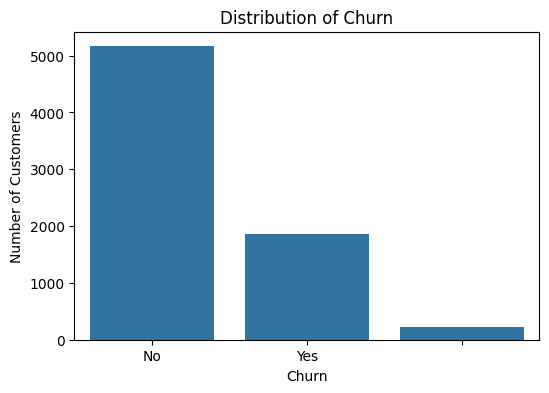

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='Churn')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

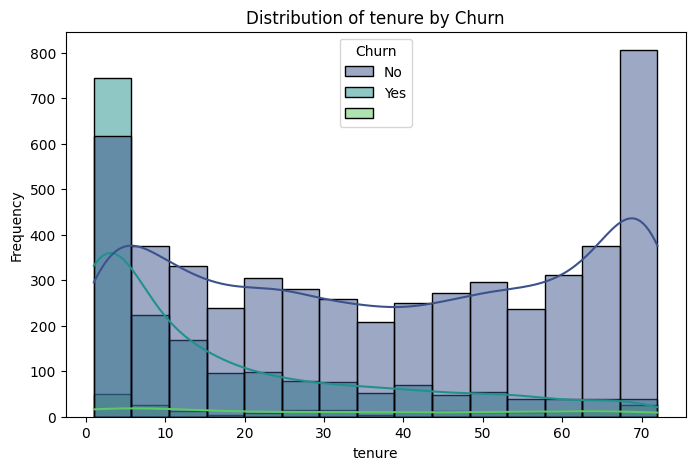

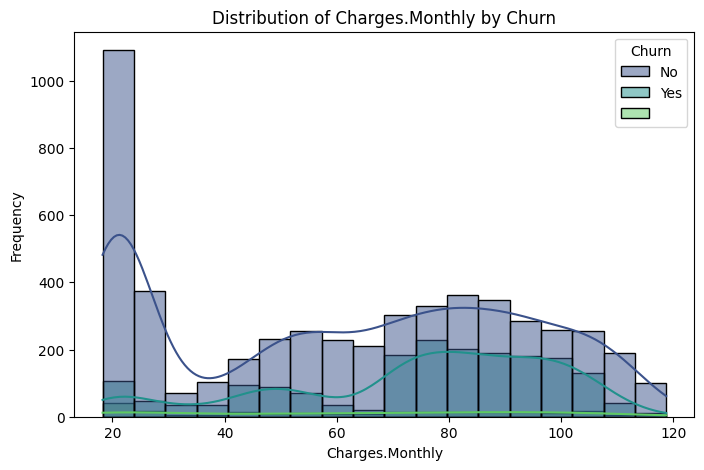

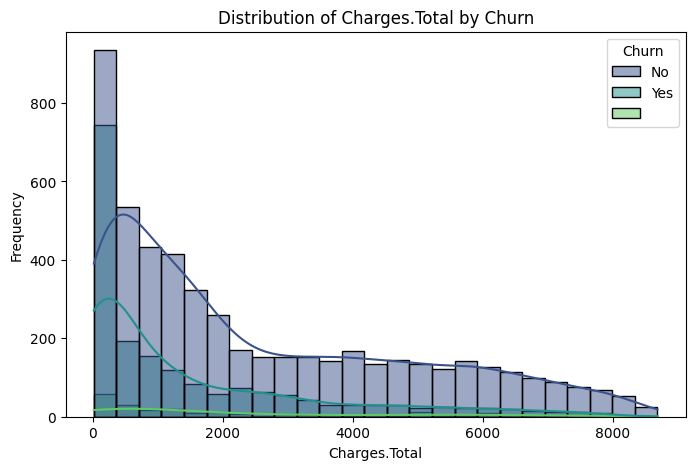

In [18]:
numerical_features_to_plot = ['tenure', 'Charges.Monthly', 'Charges.Total']

for feature in numerical_features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_cleaned, x=feature, hue='Churn', kde=True, palette='viridis')
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

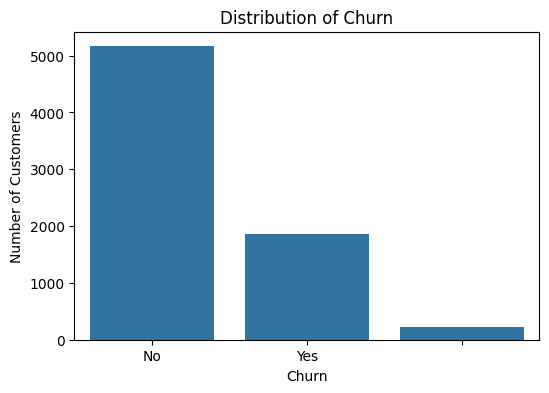

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='Churn')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

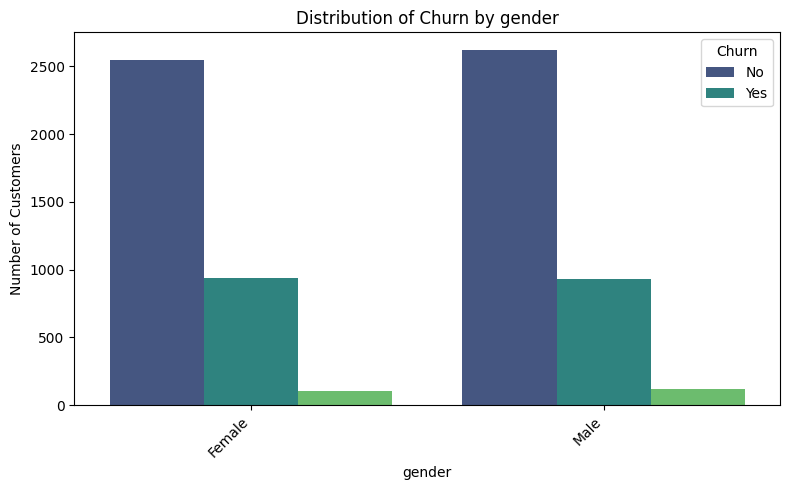

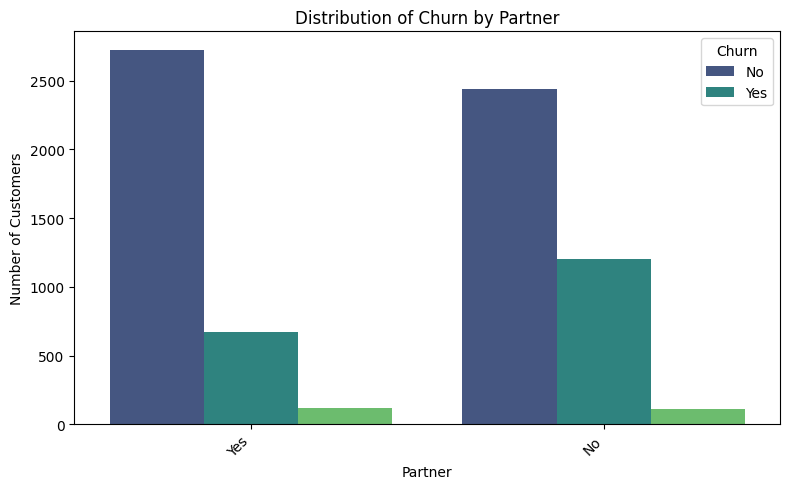

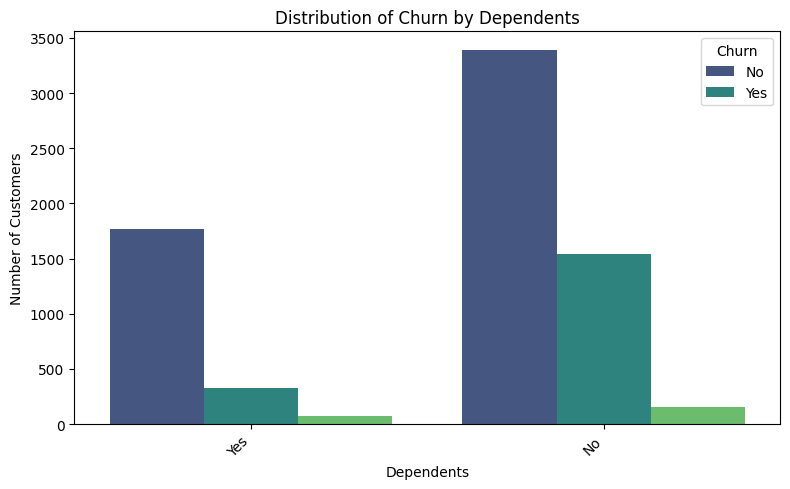

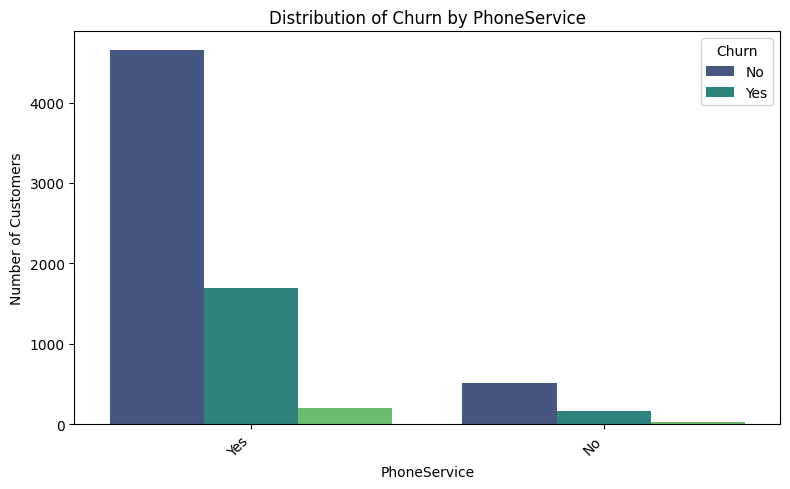

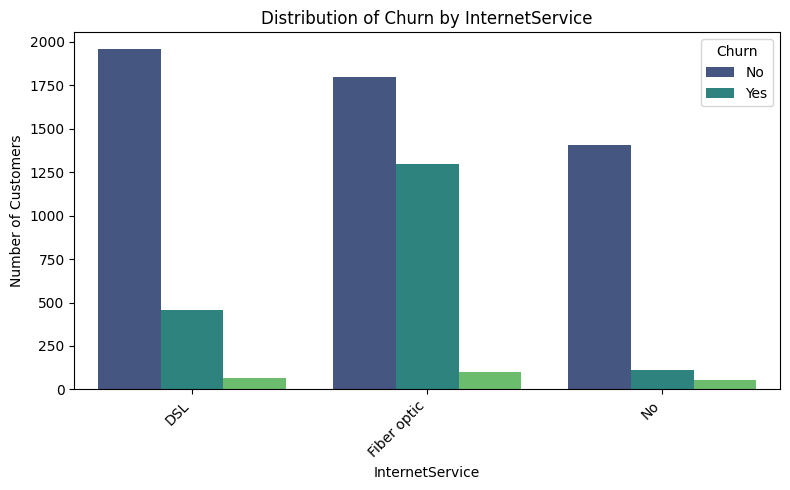

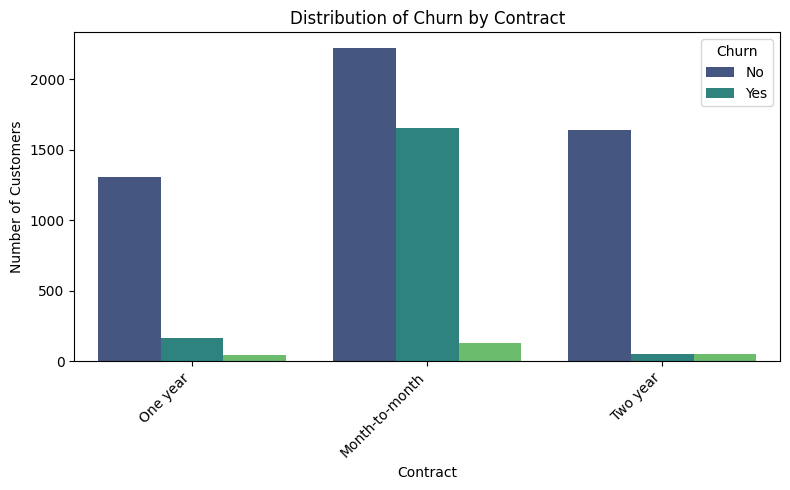

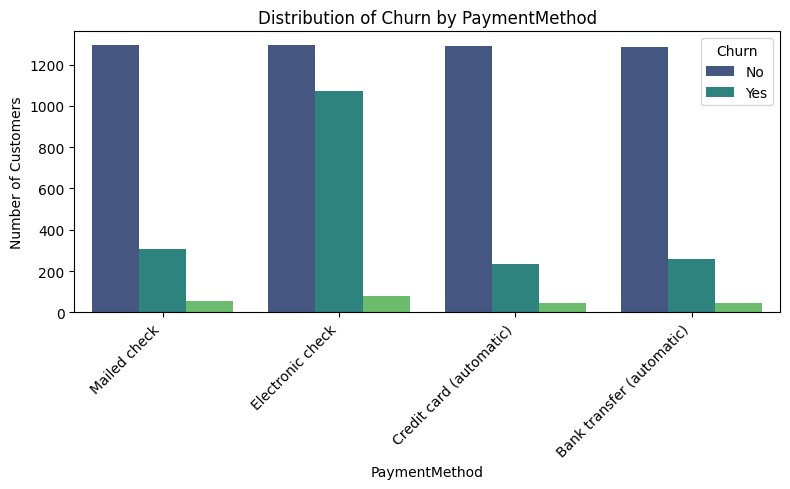

In [20]:
categorical_features_to_plot = ['gender', 'Partner', 'Dependents', 'PhoneService',
                               'InternetService', 'Contract', 'PaymentMethod']

for feature in categorical_features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_cleaned, x=feature, hue='Churn', palette='viridis')
    plt.title(f'Distribution of Churn by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

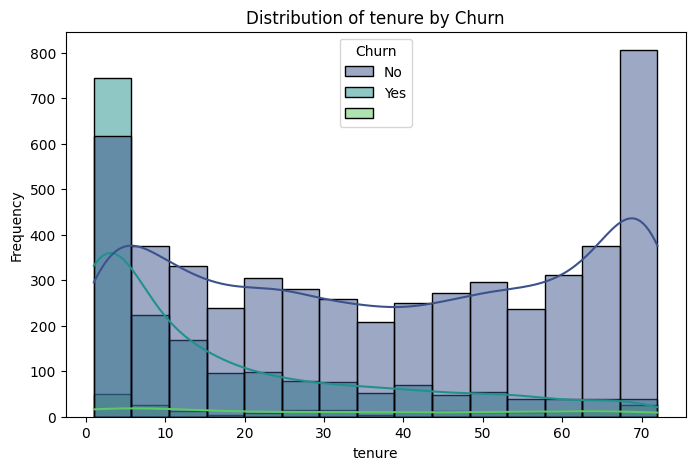

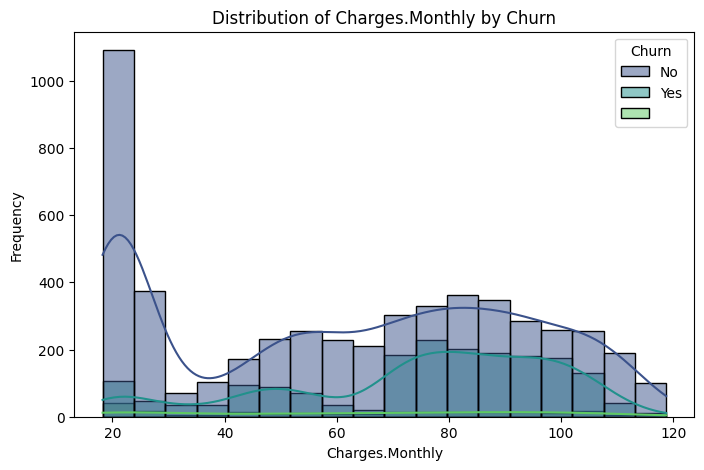

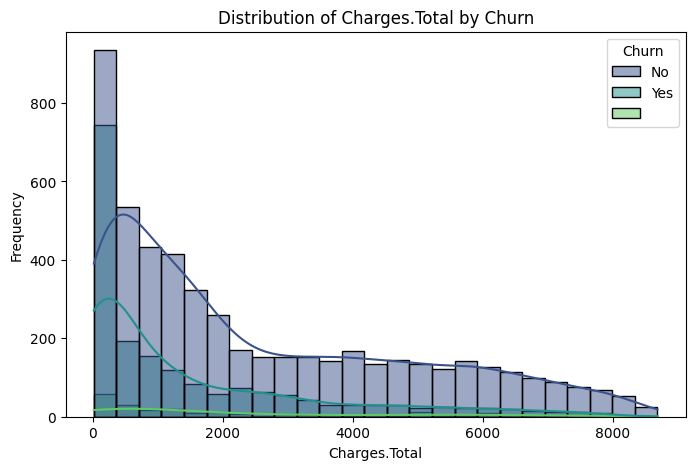

In [21]:
numerical_features_to_plot = ['tenure', 'Charges.Monthly', 'Charges.Total']

for feature in numerical_features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_cleaned, x=feature, hue='Churn', kde=True, palette='viridis')
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# 📄 Informe Final del Análisis de Evasión de Clientes (Churn)

## 🔹 Introducción

El objetivo principal de este análisis es comprender el fenómeno de la evasión de clientes (Churn) en la empresa de telecomunicaciones TelecomX y desarrollar un modelo predictivo que ayude a identificar a los clientes con mayor probabilidad de darse de baja. La evasión de clientes es un desafío crítico para las empresas, ya que retener a un cliente existente es generalmente más rentable que adquirir uno nuevo. Al comprender los factores que contribuyen a la evasión, TelecomX puede implementar estrategias de retención dirigidas y personalizadas.

El conjunto de datos utilizado contiene información detallada sobre los clientes, incluyendo sus servicios, información de cuenta y datos demográficos.

## 🔹 Limpieza y Tratamiento de Datos

La fase de limpieza y tratamiento de datos fue crucial para preparar la información para el análisis y modelado. Los pasos clave realizados fueron:

1.  **Importación de Datos:** Los datos fueron cargados desde un archivo JSON (`TelecomX_Data.json`) en un DataFrame de pandas.
2.  **Aplanamiento de Columnas Anidadas:** Las columnas que contenían diccionarios anidados (`customer`, `phone`, `internet`, `account`) fueron aplanadas y sus contenidos se integraron como nuevas columnas en el DataFrame principal (`df_flattened`).
3.  **Manejo de Valores Faltantes:** Se identificaron 11 valores faltantes en la columna `Charges.Total` después de intentar convertirla a tipo numérico. Las filas correspondientes a estos valores faltantes fueron eliminadas para asegurar la integridad del conjunto de datos limpio (`df_cleaned`).
4.  **Verificación de Duplicados:** Se verificó la ausencia de filas duplicadas en el conjunto de datos.
5.  **Identificación de Tipos de Características:** Las columnas fueron clasificadas como numéricas o categóricas para su posterior procesamiento. Las características numéricas identificadas fueron 'SeniorCitizen', 'tenure', 'Charges.Monthly', y 'Charges.Total'.
6.  **Codificación de Variables Categóricas:** Se aplicó One-Hot Encoding a las características categóricas para convertirlas en un formato numérico adecuado para los modelos. Esto resultó en la creación del DataFrame `encoded_df`.
7.  **Escalado de Variables Numéricas:** Las características numéricas fueron escaladas utilizando `StandardScaler` para normalizar sus rangos, creando el DataFrame `scaled_df`.
8.  **Combinación de Características Procesadas:** Los DataFrames con las características categóricas codificadas y las numéricas escaladas se concatenaron para formar el DataFrame `df_processed`, listo para el modelado.
9. **Creación de la columna 'Cuentas_Diarias':** Se creó una nueva columna calculando un estimado de la facturación diaria a partir de 'Charges.Monthly'.
10. **Codificación de la variable objetivo 'Churn':** La variable objetivo 'Churn' fue codificada a valores binarios (0 para 'No', 1 para 'Yes').

## 🔹 Análisis Exploratorio de Datos (EDA)

Se realizó un análisis exploratorio para comprender la distribución de las variables y su relación con la evasión de clientes.

*   **Distribución de Churn:** Se visualizó la proporción de clientes que evaden y los que no, observando un desbalance significativo en las clases.

    [Gráfico de distribución de Churn - Referencia a la celda de código que genera el countplot de Churn]

*   **Distribución de Variables Numéricas por Churn:** Se examinaron las distribuciones de 'tenure', 'Charges.Monthly' y 'Charges.Total' para clientes que evadieron y los que no. Se observaron diferencias notables, sugiriendo que estas variables están relacionadas con la evasión.

    [Gráficos de distribución de variables numéricas por Churn - Referencia a la celda de código que genera los histogramas]

*   **Distribución de Variables Categóricas por Churn:** Se analizaron las tasas de evasión para diferentes categorías en variables como género, tipo de contrato, servicio de internet y método de pago. Esto reveló patrones importantes, como una mayor tasa de evasión en clientes con contratos mes a mes y aquellos con servicio de fibra óptica.

    [Gráficos de distribución de variables categóricas por Churn - Referencia a la celda de código que genera los countplots categóricos]

## 🔹 Conclusiones e Insights

Basado en el análisis exploratorio, podemos extraer varias conclusiones clave:

*   **Desbalance de Clases:** Existe un desbalance significativo en la variable objetivo 'Churn', con muchos más clientes que no evaden que los que sí lo hacen. Esto es importante considerarlo al seleccionar y evaluar modelos.
*   **Importancia de la Antigüedad (Tenure):** Los clientes con menor antigüedad (`tenure`) tienen una mayor propensión a la evasión. Esto sugiere que los primeros meses de servicio son críticos para la retención.
*   **Impacto del Servicio de Internet y Contrato:** Los clientes con servicio de fibra óptica y contratos mes a mes muestran una tasa de evasión más alta en comparación con otros tipos de servicios o contratos.
*   **Método de Pago:** El método de pago 'Electronic check' parece estar asociado con una mayor tasa de evasión.
*   **Género, Pareja y Dependientes:** Las visualizaciones iniciales de género, si tienen pareja o dependientes, no mostraron diferencias drásticas en la tasa de evasión, aunque un análisis más profundo podría revelar interacciones con otras variables.

## 🔹 Recomendaciones

Con base en los hallazgos de este análisis, se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes:

1.  **Programas de Retención Temprana:** Implementar programas de compromiso y soporte intensivo para los nuevos clientes, especialmente durante los primeros meses de servicio, para aumentar su "tenure".
2.  **Ofertas para Contratos a Largo Plazo:** Promocionar activamente los contratos a largo plazo (un año o dos años) entre los clientes con contrato mes a mes, ofreciendo incentivos que destaquen los beneficios a largo plazo y la estabilidad.
3.  **Mejorar la Experiencia del Cliente de Fibra Óptica:** Investigar las razones detrás de la mayor tasa de evasión entre los usuarios de fibra óptica. Podría ser necesario mejorar la calidad del servicio, la atención al cliente o la comunicación de los beneficios de este servicio.
4.  **Optimizar el Proceso de Pago Electrónico:** Analizar el proceso de pago electrónico para identificar posibles puntos de fricción o insatisfacción que puedan estar contribuyendo a la evasión. Considerar ofrecer alternativas o mejorar la experiencia del usuario en este método de pago.
5.  **Segmentación de Clientes:** Utilizar los insights sobre las características demográficas (aunque menos influyentes individualmente en este análisis inicial) y de servicio para segmentar a los clientes y personalizar las estrategias de retención.
6. **Desarrollar un Modelo Predictivo de Churn:** Entrenar un modelo de clasificación utilizando los datos preprocesados para identificar proactivamente a los clientes con alto riesgo de evasión. Esto permitiría a TelecomX intervenir antes de que el cliente se vaya.

Este informe resume los pasos iniciales del análisis. La siguiente etapa crucial sería el desarrollo y la evaluación del modelo predictivo de Churn, lo que proporcionará una herramienta poderosa para la toma de decisiones basada en datos.

## 📈 Análisis de Correlación (Extra - Opcional)

In [22]:
# Convert 'Churn' to numerical for correlation analysis (0 for No, 1 for Yes)
df_cleaned['Churn_encoded'] = df_cleaned['Churn'].map({'No': 0, 'Yes': 1})

# Calculate the correlation between 'Cuentas_Diarias' and 'Churn_encoded'
correlation_daily_charges_churn = df_cleaned['Cuentas_Diarias'].corr(df_cleaned['Churn_encoded'])

print(f"Correlación entre 'Cuentas_Diarias' y 'Churn': {correlation_daily_charges_churn}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x='Cuentas_Diarias', y='Churn_encoded', alpha=0.6)
plt.title('Scatter plot of Daily Charges vs. Churn')
plt.xlabel('Cuentas_Diarias')
plt.ylabel('Churn (0: No, 1: Yes)')
plt.show()

KeyError: 'Cuentas_Diarias'

### Número de Servicios Contratados vs. Churn


Tasa de Churn por Número de Servicios Contratados:


,Num_Services,Churn_encoded
0,1,0.109524
1,2,0.310385
2,3,0.449173
3,4,0.364767
4,5,0.313789
5,6,0.256071
6,7,0.225519
7,8,0.124051
8,9,0.052885


/tmp/ipython-input-3028469698.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rate_by_services, x='Num_Services', y='Churn_encoded', palette='viridis')


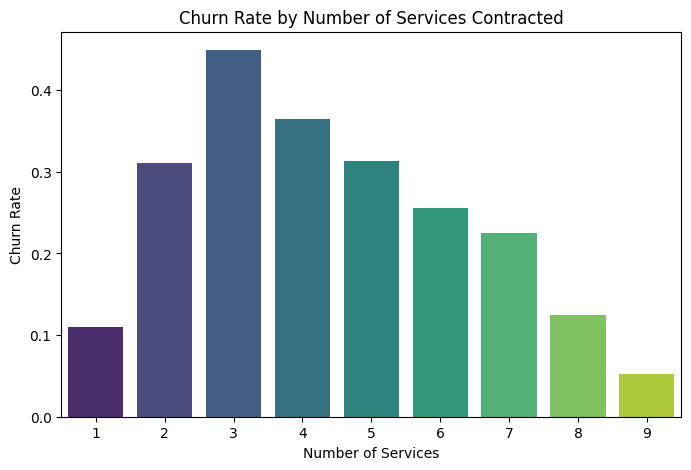

In [23]:
# Identify columns that represent services
service_columns = ['PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

# Count the number of services per customer
# Assuming 'No internet service' and 'No phone service' indicate absence of that service
def count_services(row):
    count = 0
    if row['PhoneService'] == 'Yes':
        count += 1
    if row['MultipleLines'] == 'Yes':
        count += 1
    if row['InternetService'] != 'No':
        count += 1
        if row['OnlineSecurity'] == 'Yes':
            count += 1
        if row['OnlineBackup'] == 'Yes':
            count += 1
        if row['DeviceProtection'] == 'Yes':
            count += 1
        if row['TechSupport'] == 'Yes':
            count += 1
        if row['StreamingTV'] == 'Yes':
            count += 1
        if row['StreamingMovies'] == 'Yes':
            count += 1
    return count

df_cleaned['Num_Services'] = df_cleaned.apply(count_services, axis=1)

# Calculate the average churn rate for each number of services
churn_rate_by_services = df_cleaned.groupby('Num_Services')['Churn_encoded'].mean().reset_index()

print("\nTasa de Churn por Número de Servicios Contratados:")
display(churn_rate_by_services)

# Visualize the churn rate by number of services
plt.figure(figsize=(8, 5))
sns.barplot(data=churn_rate_by_services, x='Num_Services', y='Churn_encoded', palette='viridis')
plt.title('Churn Rate by Number of Services Contracted')
plt.xlabel('Number of Services')
plt.ylabel('Churn Rate')
plt.show()

### Matriz de Correlación


Matriz de Correlación:


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Num_Services,Churn_encoded
SeniorCitizen,1.000000,0.017333,0.220098,0.103499,0.119076,0.150541
tenure,0.017333,1.000000,0.246981,0.825118,0.474168,-0.354049
Charges.Monthly,0.220098,0.246981,1.000000,0.652109,0.851845,0.192858
Charges.Total,0.103499,0.825118,0.652109,1.000000,0.778440,-0.199484
Num_Services,0.119076,0.474168,0.851845,0.778440,1.000000,-0.019644
Churn_encoded,0.150541,-0.354049,0.192858,-0.199484,-0.019644,1.000000


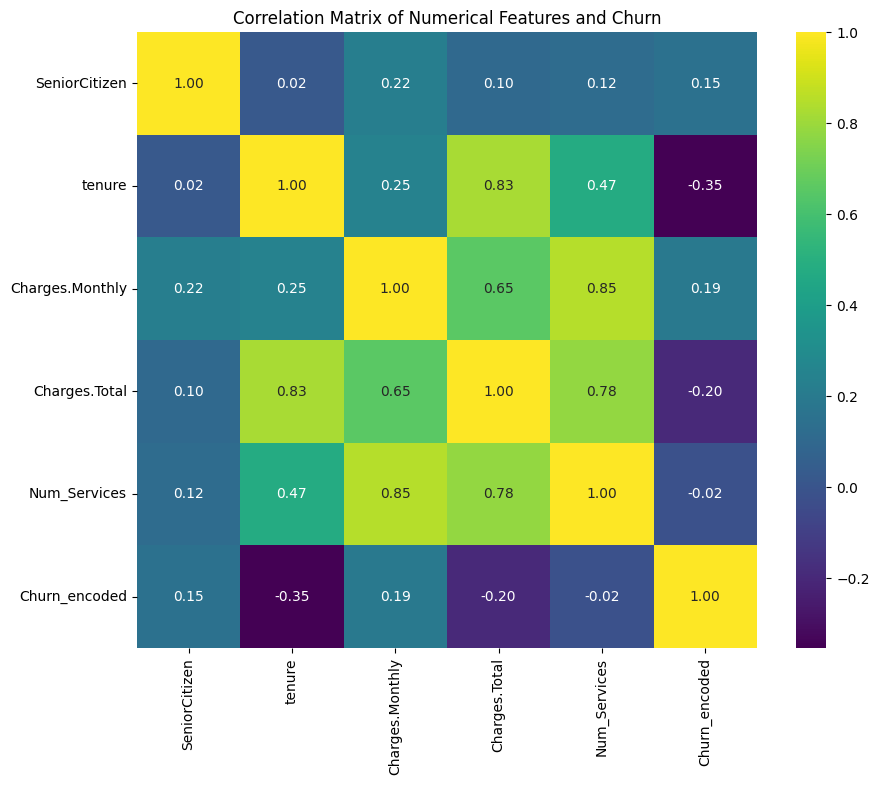

In [24]:
# Select numerical columns for correlation matrix (including the encoded Churn)
numerical_cols_for_corr = numerical_features + ['Num_Services', 'Churn_encoded']

# Calculate the correlation matrix
correlation_matrix = df_cleaned[numerical_cols_for_corr].corr()

print("\nMatriz de Correlación:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Churn')
plt.show()

## Análisis de Correlación y Número de Servicios

Hemos explorado la correlación entre variables numéricas y la variable objetivo, así como la relación entre la cantidad de servicios contratados y la tasa de evasión.

**Análisis de la Matriz de Correlación:**

La matriz de correlación visualizada como un mapa de calor nos muestra la fuerza y dirección de la relación lineal entre las variables numéricas y la variable objetivo `Churn_encoded`.

*   Observamos una **correlación negativa moderada entre `tenure` (antigüedad) y `Churn_encoded` (-0.35)**. Esto confirma nuestra observación inicial: los clientes con mayor antigüedad tienden a evadir menos.
*   Existe una **correlación positiva débil entre `Charges.Monthly` (cargos mensuales) y `Churn_encoded` (0.19)**. Esto sugiere que, en promedio, los clientes que pagan más mensualmente tienen una ligera mayor tendencia a evadir, lo cual podría estar relacionado con el tipo de servicio (como fibra óptica) que suele tener cargos mensuales más altos y que también mostró una mayor tasa de evasión en el análisis categórico.
*   La correlación entre `Charges.Total` (cargos totales) y `Churn_encoded` es **negativa débil (-0.20)**. Aunque los cargos totales están fuertemente correlacionados con la antigüedad (a mayor antigüedad, mayores cargos totales), la relación con la evasión es inversa. Esto refuerza la idea de que los clientes con mayor tiempo en la empresa (y por lo tanto mayores cargos totales acumulados) son menos propensos a irse.
*   La correlación entre `SeniorCitizen` y `Churn_encoded` es **positiva débil (0.15)**, indicando que los ciudadanos de la tercera edad tienen una ligera mayor propensión a evadir.
*   Interesantemente, la correlación entre `Num_Services` (número de servicios contratados) y `Churn_encoded` es **muy cercana a cero (-0.02)**. Esto sugiere que, de forma lineal, el simple *número* de servicios contratados no tiene una fuerte correlación directa con la evasión. Sin embargo, esto no significa que los *tipos* de servicios no sean importantes, como vimos en el análisis categórico (por ejemplo, InternetService).

**Análisis del Número de Servicios Contratados vs. Churn:**

El gráfico de barras que muestra la tasa de evasión por el número de servicios contratados revela un patrón más complejo que la simple correlación lineal:

*   La tasa de evasión es relativamente baja para clientes con 1 o 8-9 servicios.
*   La tasa de evasión alcanza su punto máximo para clientes que tienen 3 servicios contratados.
*   Hay una disminución gradual en la tasa de evasión a medida que aumenta el número de servicios más allá de 3.

Esto indica que no es solo la cantidad de servicios, sino posiblemente la *combinación* de servicios o el tipo de cliente que tiende a contratar un cierto número de servicios, lo que influye en la evasión. Por ejemplo, los clientes con pocos servicios (1) podrían ser clientes básicos de voz con baja propensión a evadir, mientras que aquellos con 3 servicios podrían estar en un punto donde la complejidad o el costo asociado aumenta el riesgo de evasión.

En resumen, el análisis de correlación y la exploración del número de servicios confirman la importancia de variables como la antigüedad y los cargos, y sugieren que la relación entre el número de servicios y la evasión es no lineal, siendo más compleja que una simple asociación directa. Estos insights son valiosos para la ingeniería de características y la selección de modelos en las próximas etapas.